In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [3]:
%matplotlib notebook

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
bdf_mass = load_dir(dirname='/data/new_trap/20200518/Bead2/Mass0519/', file_prefix='Mass')
bdf_discharge = load_dir(dirname='/data/new_trap/20200518/Bead2/Discharge/Discharge0519/', file_prefix='Discharge')

45  files in folder
45  files loaded
458  files in folder
458  files loaded


In [121]:
file_i = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge])

In [14]:
m1 = gfw.build_z_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  9.87e+02
reduced chi2:  40066.68968911257
***************************************************
Z2-amplitude:  6.89e+02
reduced chi2:  16514.563631201767
***************************************************
Z2-amplitude:  8.64e+02
reduced chi2:  36089.49226088625
***************************************************
Z2-amplitude:  8.56e+02
reduced chi2:  10784.474837318516
***************************************************
Z2-amplitude:  7.96e+02
reduced chi2:  17519.80619600845
***************************************************
Z2-amplitude:  8.30e+02
reduced chi2:  24555.360021797806
***************************************************
Z2-amplitude:  8.59e+02
reduced chi2:  22540.370297969443
***************************************************
Z2-amplitude:  8.36e+02
reduced chi2:  17281.761435244927
***************************************************
Z2-amplitude:  8.15e+02
reduced chi2:  23941.18856669215
**************

***************************************************
Z2-amplitude:  6.47e+02
reduced chi2:  527.2783114911056
***************************************************
Z2-amplitude:  6.43e+02
reduced chi2:  545.0286323064125
***************************************************
Z2-amplitude:  6.58e+02
reduced chi2:  390.7094903100138
***************************************************
Z2-amplitude:  6.66e+02
reduced chi2:  418.007225851256
***************************************************
Z2-amplitude:  6.73e+02
reduced chi2:  599.1021122382839
***************************************************
Z2-amplitude:  6.20e+02
reduced chi2:  666.5711882405832
***************************************************
Z2-amplitude:  5.67e+02
reduced chi2:  328.85611904907717
***************************************************
Z2-amplitude:  5.23e+02
reduced chi2:  196.53539562108773
***************************************************
Z2-amplitude:  5.07e+02
reduced chi2:  316.9225755620183
******************

***************************************************
Z2-amplitude:  3.01e+02
reduced chi2:  604.298335241544
***************************************************
Z2-amplitude:  3.13e+02
reduced chi2:  463.8464310325251
***************************************************
Z2-amplitude:  3.03e+02
reduced chi2:  223.76011130061931
***************************************************
Z2-amplitude:  3.01e+02
reduced chi2:  298.32248512412417
***************************************************
Z2-amplitude:  3.04e+02
reduced chi2:  271.24818431303174
***************************************************
Z2-amplitude:  2.98e+02
reduced chi2:  236.46028570662784
***************************************************
Z2-amplitude:  3.09e+02
reduced chi2:  312.5625371646022
***************************************************
Z2-amplitude:  3.01e+02
reduced chi2:  125.9760305627924
***************************************************
Z2-amplitude:  3.04e+02
reduced chi2:  359.1236511906339
****************

***************************************************
Z2-amplitude:  1.77e+02
reduced chi2:  341.9511762932229
***************************************************
Z2-amplitude:  1.77e+02
reduced chi2:  371.8841304774911
***************************************************
Z2-amplitude:  1.74e+02
reduced chi2:  292.12609651971513
***************************************************
Z2-amplitude:  1.66e+02
reduced chi2:  177.66790463361312
***************************************************
Z2-amplitude:  1.69e+02
reduced chi2:  324.0773060047606
***************************************************
Z2-amplitude:  1.74e+02
reduced chi2:  242.25032914538082
***************************************************
Z2-amplitude:  1.73e+02
reduced chi2:  239.8489044102152
***************************************************
Z2-amplitude:  1.72e+02
reduced chi2:  231.83082876872487
***************************************************
Z2-amplitude:  1.71e+02
reduced chi2:  149.20973095111796
**************

***************************************************
Z2-amplitude:  6.20e+01
reduced chi2:  154.34354933003715
***************************************************
Z2-amplitude:  5.31e+01
reduced chi2:  436.17602247805087
***************************************************
Z2-amplitude:  5.75e+01
reduced chi2:  357.86203943166294
***************************************************
Z2-amplitude:  5.19e+01
reduced chi2:  604.8644952571175
***************************************************
Z2-amplitude:  4.43e+01
reduced chi2:  290.04469443461613
***************************************************
Z2-amplitude:  5.99e+01
reduced chi2:  238.55292958287035
***************************************************
Z2-amplitude:  4.68e+01
reduced chi2:  521.4829549401605
***************************************************
Z2-amplitude:  1.27e+01
reduced chi2:  396.8155466691284
***************************************************
Z2-amplitude:  1.62e+01
reduced chi2:  299.32942380049485
*************

***************************************************
Z2-amplitude:  1.98e+02
reduced chi2:  270.5666344429032
***************************************************
Z2-amplitude:  2.03e+02
reduced chi2:  292.6837284944572
***************************************************
Z2-amplitude:  9.34e+01
reduced chi2:  351.2101432240475
***************************************************
Z2-amplitude:  4.94e+01
reduced chi2:  89.03845544063985
***************************************************
Z2-amplitude:  1.03e+02
reduced chi2:  237.67177750326
***************************************************
Z2-amplitude:  1.59e+02
reduced chi2:  498.06166348612413
***************************************************
Z2-amplitude:  9.78e+01
reduced chi2:  158.819716911578
***************************************************
Z2-amplitude:  1.05e+02
reduced chi2:  384.8157467643201
***************************************************
Z2-amplitude:  9.56e+01
reduced chi2:  684.1377486772968
*********************

In [15]:
# phases = np.array([m_.values[2] for m_ in m1])
amps = np.array([m_.values[0] for m_ in m1])

<IPython.core.display.Javascript object>


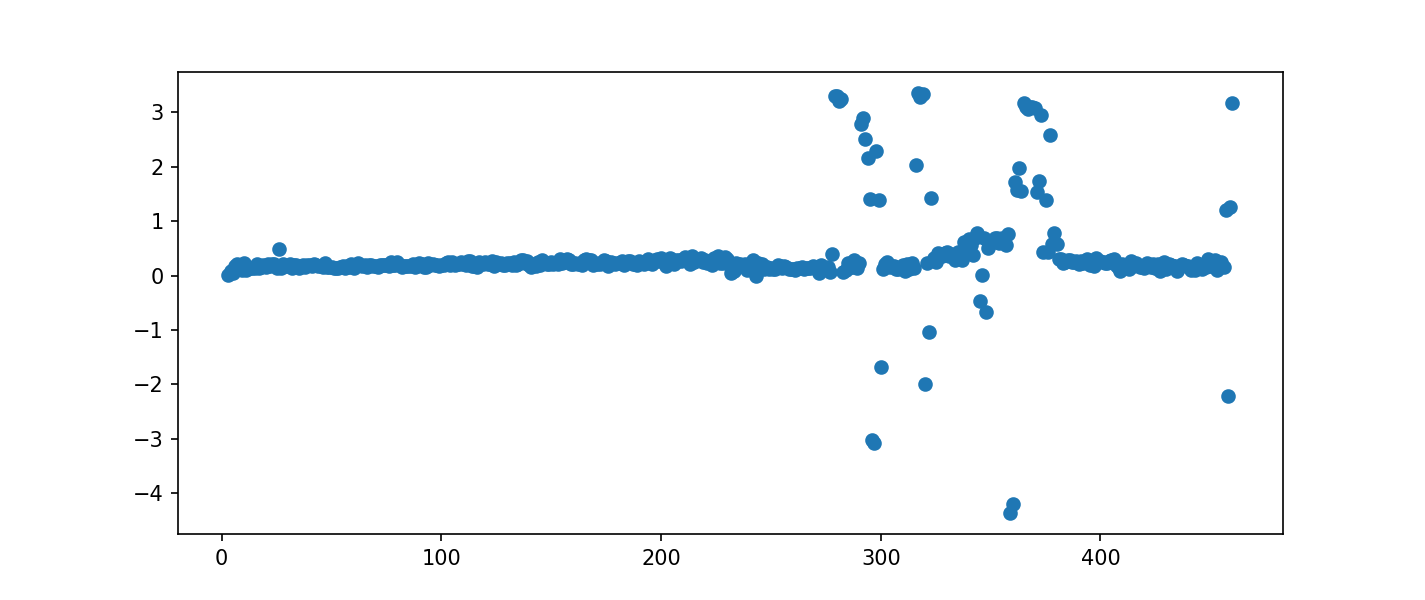

In [124]:
_,ax = plt.subplots(figsize=(9.5, 4))
ax.scatter(file_i, phases)

<IPython.core.display.Javascript object>


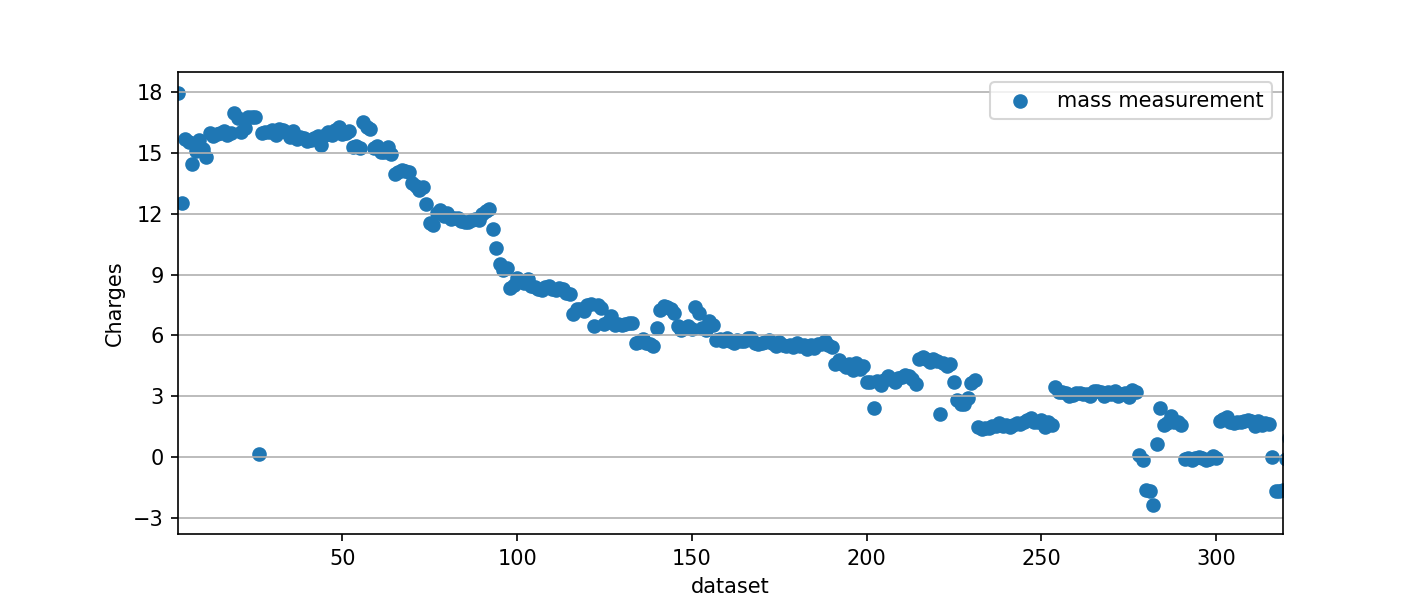

In [128]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.

# Mass
ax.scatter(file_i, amps/scale/1.2, label='mass measurement')

ax.legend()
ax.set(xlabel='dataset', xlim=(3,319), ylabel='Charges', ylim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

<IPython.core.display.Javascript object>


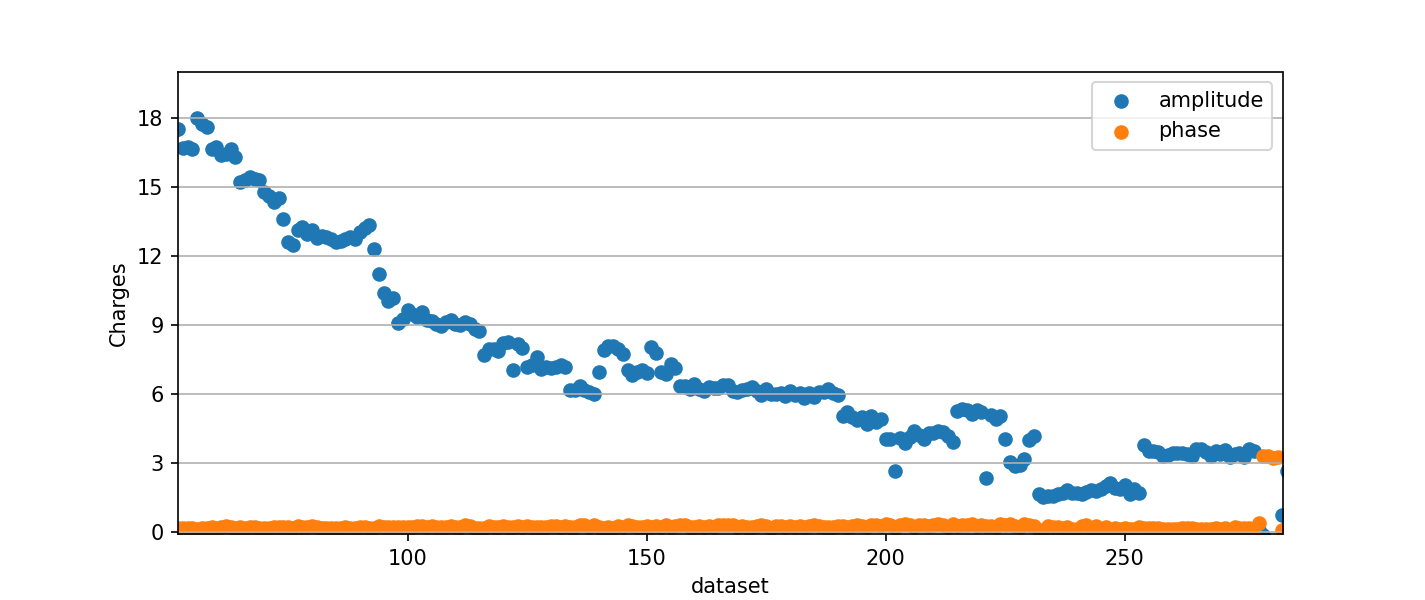

In [150]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.

# Mass
ax.scatter(file_i, amps/scale/1.1, label='amplitude')
ax.scatter(file_i, phases, label='phase')

ax.legend()
ax.set(xlabel='dataset', xlim=(52,283), ylabel='Charges', ylim=(-0.1,20))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [166]:
bb = bdf_mass[-12]
charges = 17
voltage = 3
force = charges * 1.6e-19 * 2 * voltage * 50 / 8.6e-3 * 0.63  # in Newtons
bb.fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_36.h5'

In [157]:
bb.fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_41.h5'

<IPython.core.display.Javascript object>


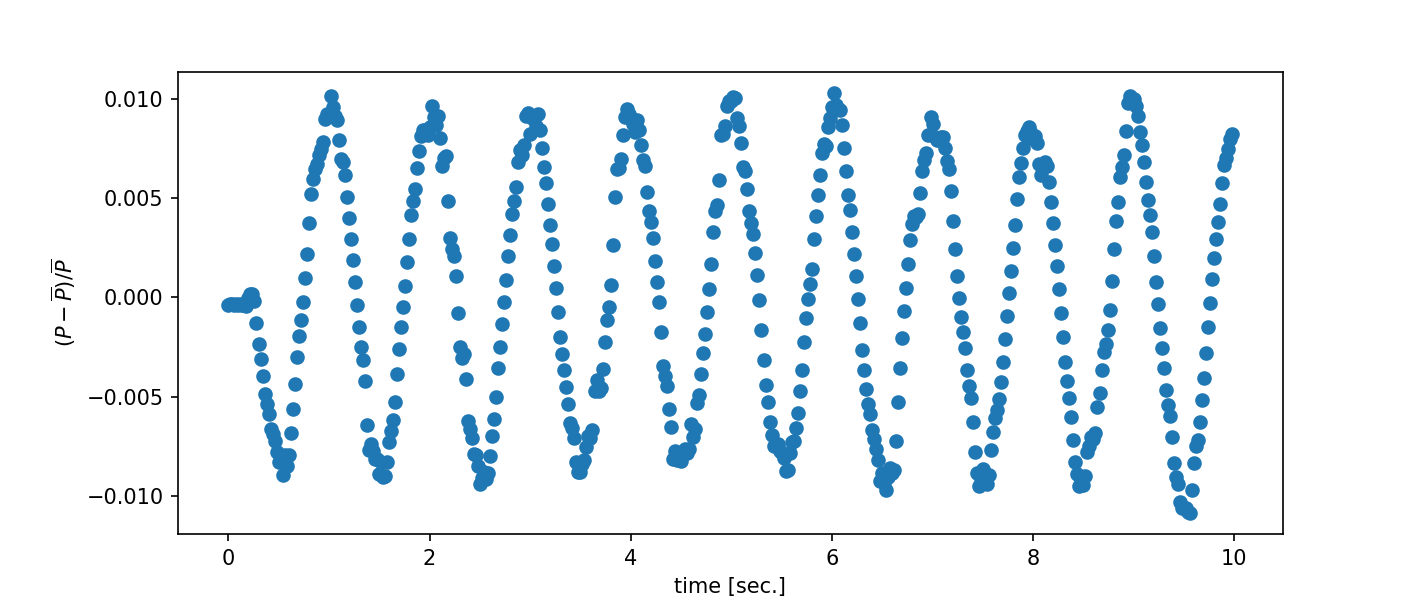

mass in pg:  575.1471384679028
power decrease [%] (peak to valley):  2.1210808038912923
force:  5.977674418604651e-14


In [168]:
nroll = 0
ff = np.roll(np.mean(bb.Iz.reshape(500,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(500)*1/50, (ff-np.mean(ff))/np.mean(ff))
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [173]:
# bb.Iz.shape, 250000/1000, 5000/250
get_mass(bb, charges=17)

[668.3292398032712,
 634.8445380432096,
 637.7833628181003,
 665.2048977497831,
 671.8243224112738,
 646.1113001333664,
 607.8323956875735,
 668.0943305810074,
 619.7973751390062,
 582.3239918981004]

In [172]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(500,-1), axis=1)
    force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
    masses = []
    for i in range(10):
        subset = ff[i*50:(i+1)*50]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 2 * 50 * voltage / 8e-3 * 0.63  # in Newtons
    data = np.mean(bb.Iz.reshape(250000,-1), axis=1)
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2])+x[3] - data
    est_amp, est_freq, est_phase, est_shift = leastsq(optimize_func, [0.1, 1, 0.2,1])[0]
    print(est_amp, est_freq, est_phase, est_shift)
    return -1/est_amp*force/9.8*1e15

In [103]:
charges = 17
mass_mean = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass[-6:-1]]
mass_std = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass[-6:-1]]

In [104]:
# bb = bdf_mass[-2]
# get_mass(bb, charges=charges)
mass_mean, mass_std

([601.0687959673111,
  603.1478458141821,
  605.2709593012586,
  612.0934379076971,
  601.6660068054352],
 [16.20415375913166,
  21.5118001894934,
  21.59044547594043,
  18.915151105443886,
  20.983025151059962])

<IPython.core.display.Javascript object>


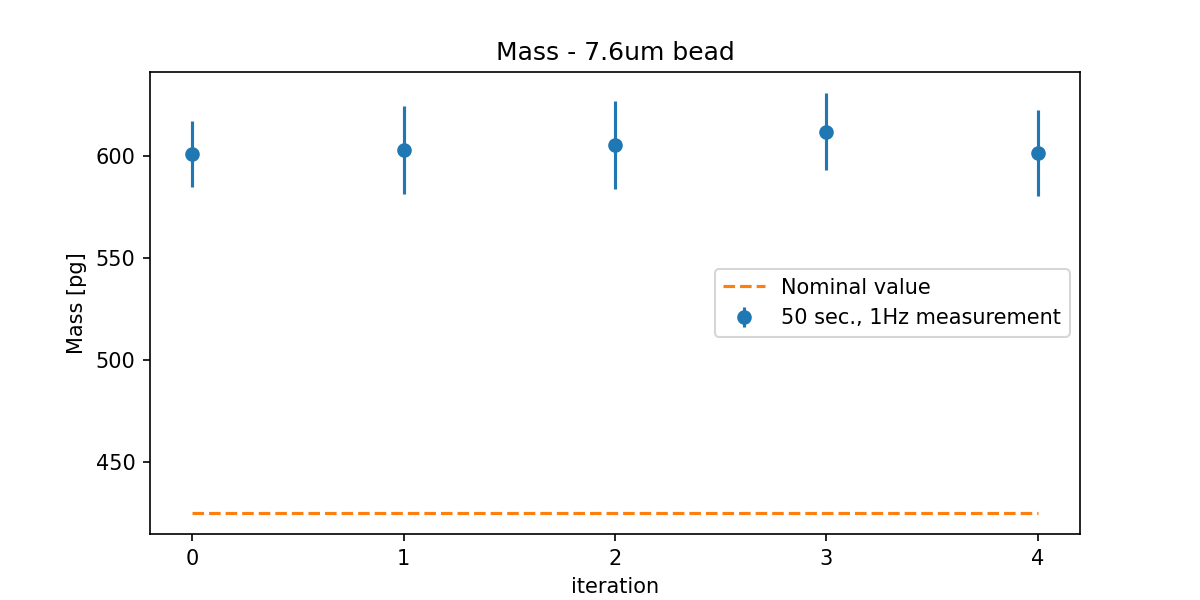

In [91]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.plot(range(5), np.arange(5)*0+425, '--', label='Nominal value')
ax.legend()
ax.set(title='Mass - 7.6um bead', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [101]:
charges = 17
[get_mass2(bb, charges=charges) for bb in bdf_mass[-6:-1]]
# bdf_mass[-6].fname

0.011301076512280777 1.0 1.5027618751641763 1.0
-0.011363514735707032 1.0 -0.3428077698194489 0.9999999999999734
-0.011292613500300884 1.0 -0.3596224862327241 1.0
-0.01123814222726135 1.0 -0.36661635620263505 0.9999999999999968
-0.01131111389848724 1.0 -0.3831832078823573 0.9999999999999882


[-754.2897090398822,
 750.1451718542905,
 754.8549956180286,
 758.5137776248821,
 753.6203587717173]